In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [2]:
# Path dataset
path = "Dataset/new-sentiment-analysis.csv"

# Baca ulang data dengan delimiter koma dan spasi
df = pd.read_csv(path, sep=",\s*", engine='python')

# Perbaiki nama kolom
df.columns = df.columns.str.replace('"', '').str.strip()

# Bersihkan kolom 'Text' dan 'Confidence Score'
df['Text'] = df['Text'].astype(str).str.replace('"', '').str.strip()
df['Confidence Score'] = df['Confidence Score'].astype(str).str.replace('"', '').replace('None', np.nan).astype(float)

# Konversi kolom waktu ke datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'], errors='coerce')

# Ekstrak jam dan hari dari timestamp
df['Hour'] = df['Date/Time'].dt.hour
df['Day'] = df['Date/Time'].dt.date


In [3]:
print("\n=== DISTRIBUSI SENTIMEN ===")
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

print("\n=== CONFIDENCE SCORE ===")
print(f"Rata-rata: {df['Confidence Score'].mean():.2f}")
print(f"Median: {df['Confidence Score'].median():.2f}")

print("\n=== TOP 5 PLATFORM ===")
print(df['Source'].value_counts().head(5))

print("\n=== TOP 5 LOKASI ===")
print(df['Location'].value_counts().head(5))




=== DISTRIBUSI SENTIMEN ===
Sentiment
Positive    53
Negative    43
Name: count, dtype: int64

=== CONFIDENCE SCORE ===
Rata-rata: 0.79
Median: 0.86

=== TOP 5 PLATFORM ===
Source
Online Store      11
Spotify            9
Zomato             7
Website Review     7
IMDb               6
Name: count, dtype: int64

=== TOP 5 LOKASI ===
Location
Sydney     12
London     11
Toronto    10
Paris      10
Berlin     10
Name: count, dtype: int64


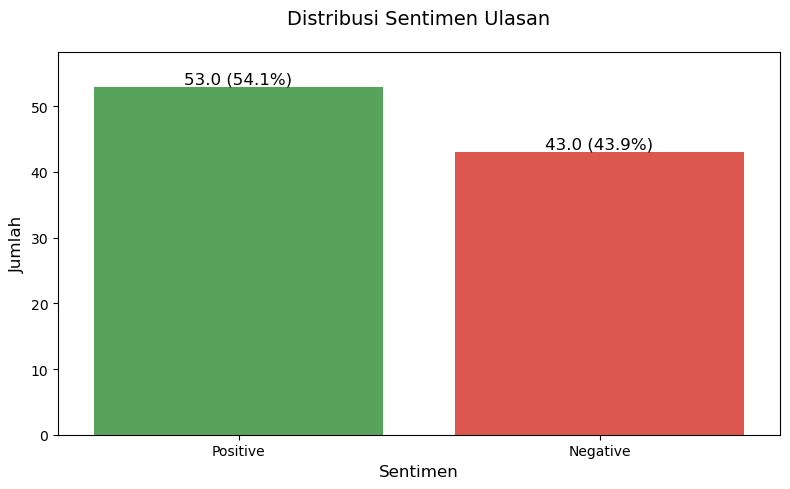

In [4]:
sns.set_palette("pastel")
colors = {"Positive": "#4CAF50", "Negative": "#F44336"}

plt.figure(figsize=(8, 5))
ax = sns.countplot(
    data=df,
    x='Sentiment',
    hue='Sentiment',
    order=sentiment_counts.index,
    palette=colors,
    legend=False  # Matikan legend karena x dan hue sama
)

# Tambahkan annotasi jumlah dan persentase
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2., height + 0.5,
        f'{height} ({height / len(df) * 100:.1f}%)',
        ha='center', fontsize=12
    )

plt.title('Distribusi Sentimen Ulasan', fontsize=14, pad=20)
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.ylim(0, max(sentiment_counts) * 1.1)
plt.tight_layout()
plt.savefig('sentiment_distribution.png', dpi=300)
plt.show()


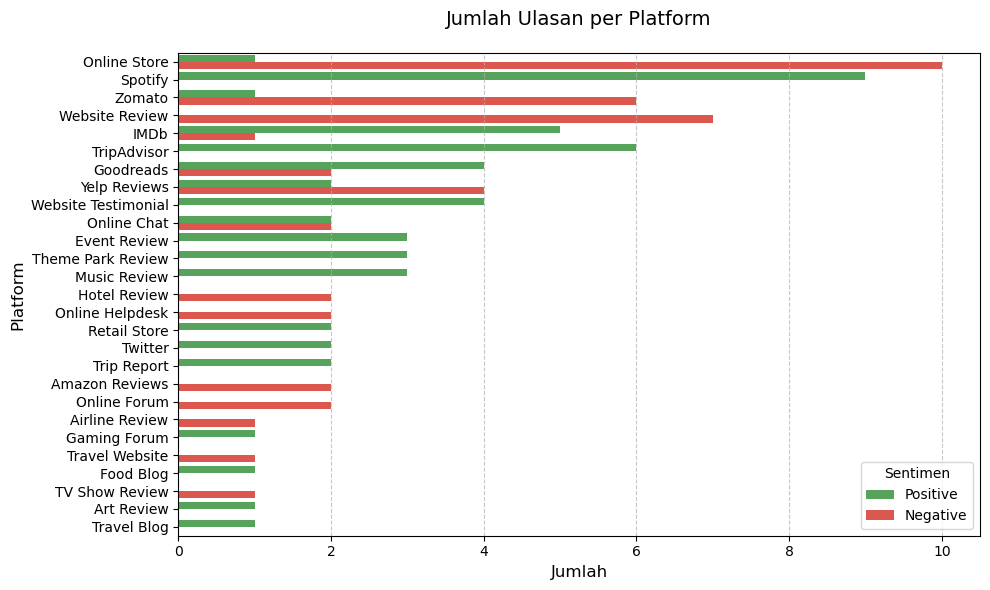

In [5]:
plt.figure(figsize=(10, 6))
platform_order = df['Source'].value_counts().index
ax = sns.countplot(data=df, y='Source', order=platform_order, hue='Sentiment', palette=colors)

plt.title('Jumlah Ulasan per Platform', fontsize=14, pad=20)
plt.xlabel('Jumlah', fontsize=12)
plt.ylabel('Platform', fontsize=12)
plt.legend(title='Sentimen')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('platform_distribution.png', dpi=300)
plt.show()


<Figure size 1200x600 with 0 Axes>

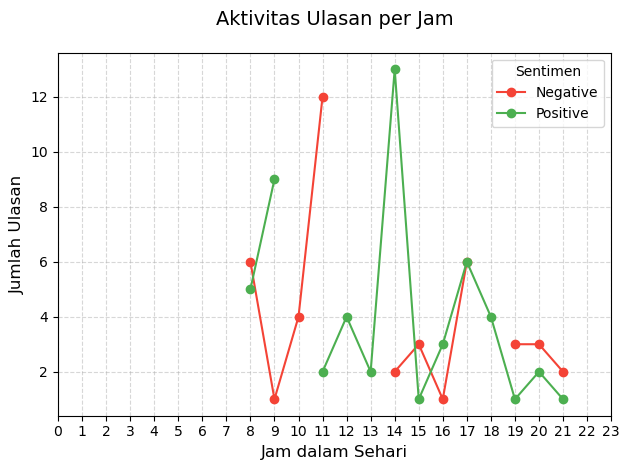

In [13]:
plt.figure(figsize=(12, 6))
hourly_data = df.groupby(['Hour', 'Sentiment']).size().unstack()
hourly_data.plot(kind='line', color=[colors['Negative'], colors['Positive']], marker='o')

plt.title('Aktivitas Ulasan per Jam', fontsize=14, pad=20)
plt.xlabel('Jam dalam Sehari', fontsize=12)
plt.ylabel('Jumlah Ulasan', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(linestyle='--', alpha=0.5)
plt.legend(title='Sentimen')
plt.tight_layout()
plt.savefig('hourly_activity.png', dpi=300)
plt.show()


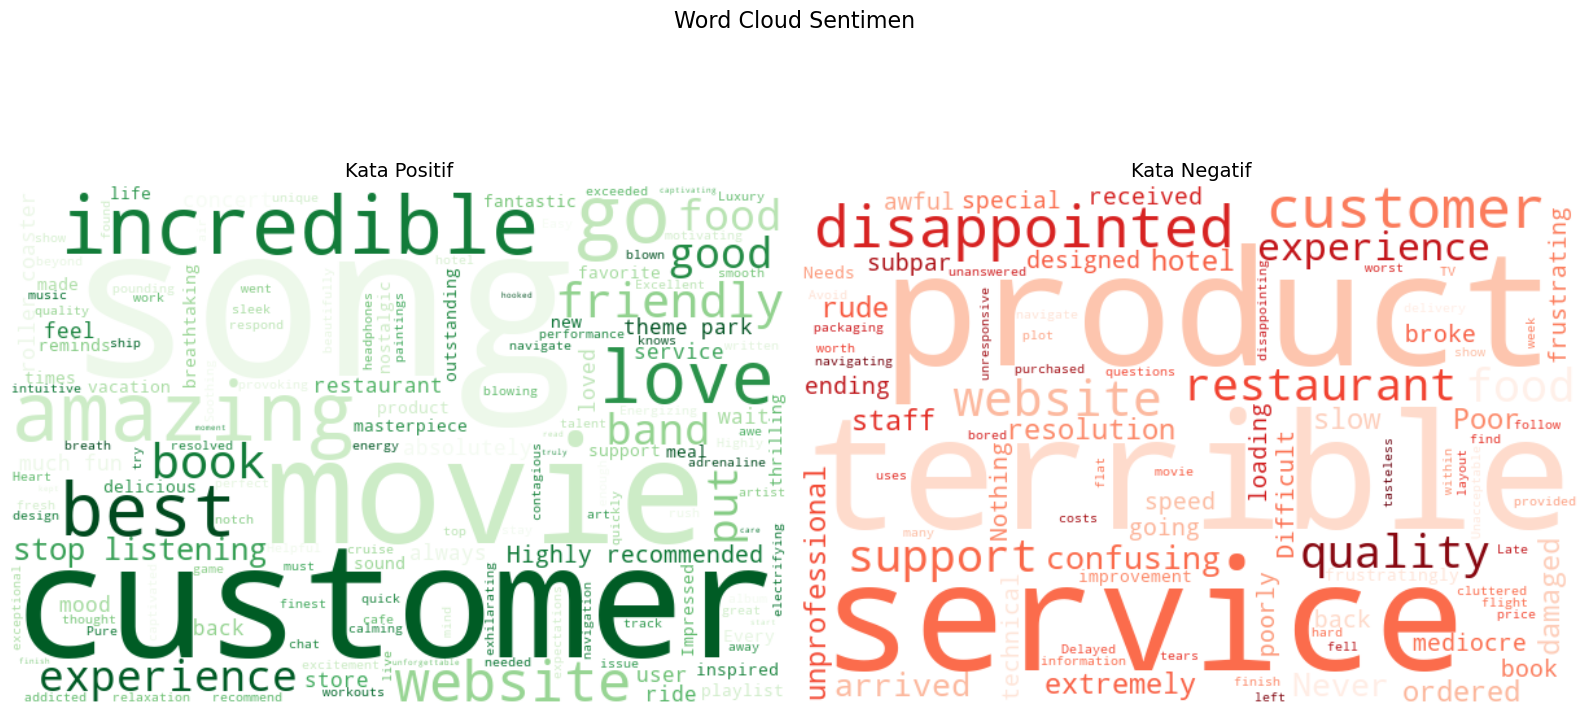

In [11]:
positive_text = " ".join(df[df['Sentiment']=='Positive']['Text'])
negative_text = " ".join(df[df['Sentiment']=='Negative']['Text'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

wc_positive = WordCloud(width=600, height=400, background_color='white', colormap='Greens').generate(positive_text)
ax1.imshow(wc_positive, interpolation='bilinear')
ax1.set_title('Kata Positif', fontsize=14)
ax1.axis('off')

wc_negative = WordCloud(width=600, height=400, background_color='white', colormap='Reds').generate(negative_text)
ax2.imshow(wc_negative, interpolation='bilinear')
ax2.set_title('Kata Negatif', fontsize=14)
ax2.axis('off')

plt.suptitle('Word Cloud Sentimen', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('wordcloud.png', dpi=300, bbox_inches='tight')
plt.show()
